In [1]:
import os
import fs
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
#from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib import patches as mpatches
import numpy as np
import tifffile
from shapely.geometry import shape, box
from shapely.affinity import translate
import string
#import anndata as ad

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [3]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [4]:
vizgen_dir = Path().resolve() /'home'/'jupyter'/'region_2'
adata = sq.read.vizgen(
    path='/home/jupyter/region_2',
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    #transformation_file="micron_to_mosaic_pixel_transform.csv",
)

In [5]:
ser_exp = adata.to_df().sum(axis=1)
adata.obs['ExpressionCounts'] = ser_exp

<AxesSubplot:xlabel='ExpressionCounts', ylabel='Count'>

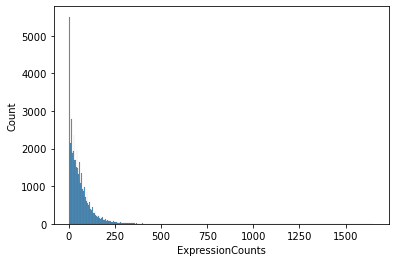

In [6]:
#fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(
    adata.obs["ExpressionCounts"],
    #log_scale=10,
    #kde=False,
    #ax=axs[0],
)
#g.set(xlim=(0, 500))

[(0.0, 1000.0)]

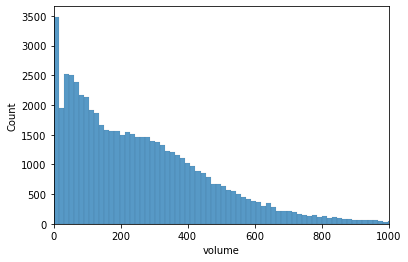

In [7]:
g=sns.histplot(
    adata.obs["volume"],
    #kde=False,
    #bins=60,
    #ax=axs[2],
)
g.set(xlim=(0, 1000))

In [8]:
adata

AnnData object with n_obs × n_vars = 59080 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts'
    uns: 'spatial'
    obsm: 'spatial'

In [9]:
sc.pp.filter_cells(adata, min_counts=10)
#sc.pp.filter_genes(adata, min_cells=10)

In [10]:
adata

AnnData object with n_obs × n_vars = 49391 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [11]:

adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

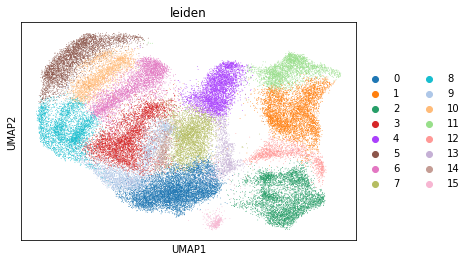

In [12]:
sc.pl.umap(
    adata,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

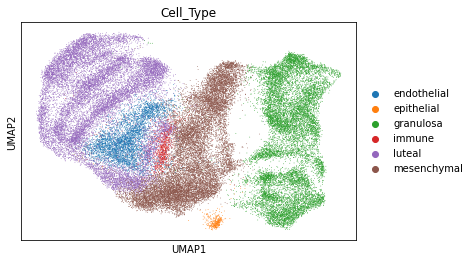

In [25]:
sc.pl.umap(
    adata,
    color=[
        "Cell_Type",
    ],
    wspace=0.4,
    #figsize=(15, 15),
    cmap = 'tab20b',
)

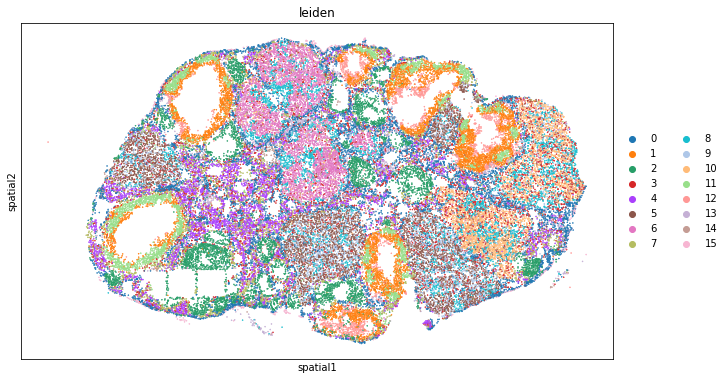

In [14]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    size=0.5,
    library_id='spatial',
    figsize=(10, 10)
)

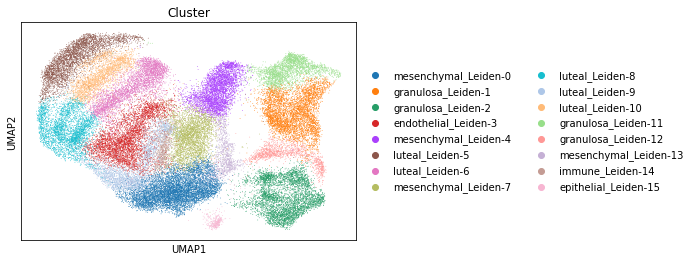

In [26]:
sc.pl.umap(
    adata,
    color=[
        "Cluster",
    ],
    wspace=0.4,
    #figsize=(15, 15),
    cmap = 'tab20b',
)

In [13]:
df_ref_panel_ini = pd.read_excel('/home/jupyter/Marker_4hrs.xlsx', index_col=0)
#df_ref_panel = df_ref_panel_ini.iloc[1:,2]
df_ref_panel = df_ref_panel_ini[df_ref_panel_ini.iloc[:, 2].notnull()]
df_ref_panel

Source Mouse Specific?   \
Gene                                                                          
Aldh1a1  gerton ; Richards ; ruptured/unruptured, post hCG              NaN   
Amh                                   GC_markers_YYcurated              NaN   
Amhr2                                 GC_markers_YYcurated              NaN   
Apoe                                 gerton / PNAS / Britt              NaN   
Bhmt                                        gerton dataset              NaN   
Ccl5                                 gerton / PNAS / Britt              NaN   
Cd14                                 gerton / PNAS / Britt              NaN   
Cd74                                 gerton / PNAS / Britt              NaN   
Cldn5                     gerrton dataset and PNAS dataset              NaN   
Col1a1                                       PNAS dataset               NaN   
Col1a2        PNAS dataset ; ruptured/unruptured, post hCG              NaN   
Col3a1   PNAS dataset ; ruptured/unruptured, no hCG ; r...              NaN   
Cyp17a1                                      Richards_Data              NaN   
Dcn                                          PNAS dataset               NaN   
Egfl7                     gerrton dataset and PNAS dataset              NaN   
Epcam                      gerton / Britt ; gerton dataset              NaN   
Foxl2    GC_markers_Yycurated ; ruptured/unruptured, po...              NaN   
Fst      GC_markers_Yycurated ; ruptured/unruptured, po...              NaN   
Gm2a                                                gerton              NaN   
H2-Aa                                gerton / PNAS / Britt              NaN   
H2-Ab1                               gerton / PNAS / Britt              NaN   
Hao2                                                gerton              NaN   
Has2                                         Richards_Data              NaN   
Idh1                                                gerton              NaN   
Inha     GC_markers_Yycurated ; ruptured/unruptured, no...              NaN   
Krt18                                       gerton / Britt              NaN   
Krt19                GC_markers_Yycurated ; gerton / Britt              NaN   
Krt7                                        gerton / Britt              NaN   
Ly6e                                        gerton / Britt              NaN   
Mgarp                                               gerton              NaN   
Nap1l5                         ruptured/unruptured, no hCG              NaN   
Pecamp1                                     gerton dataset              Yes   
Prlr                                                gerton              NaN   
Ptx3                             Richards_Data; Jiyang_8hr              NaN   
Rspo1                                 GC_markers_YYcurated              NaN   
S100a9                                       PNAS dataset               NaN   
Spp1                            gerton dataset; Jiyang_8hr              NaN   
Upk3b                                 GC_markers_YYcurated              NaN   

                      NOTES                                Gene Description  \
Gene                                                                          
Aldh1a1        mesenchymal                                              NaN   
Amh                GC_Small                          anti-Mullerian hormone   
Amhr2              GC_Small          anti-Mullerian hormone receptor type 2   
Apoe     immune: macs/monos                                             NaN   
Bhmt                luteal                                              NaN   
Ccl5     immune: macs/monos                                             NaN   
Cd14     immune: macs/monos                                             NaN   
Cd74     immune: macs/monos                                             NaN   
Cldn5           endothelial                                             NaN   
Col1a1         mesench

In [14]:
marker_genes = df_ref_panel.index.tolist()
meta_gene = deepcopy(adata.var)
common_marker_genes = list(set(meta_gene.index.tolist()).intersection(marker_genes))
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']
meta_gene['Markers'] = meta_gene['Markers'].apply(lambda x: 'N.A.' if 'marker' not in str(x) else x)
meta_gene['Markers'].value_counts()

N.A.    228
Name: Markers, dtype: int64

In [15]:
ser_counts = adata.obs['leiden'].value_counts()
ser_counts.name = 'cell counts'
meta_leiden = pd.DataFrame(ser_counts)

cat_name = 'leiden'
sig_leiden = pd.DataFrame(columns=adata.var_names, index=adata.obs[cat_name].cat.categories)
for clust in adata.obs[cat_name].cat.categories:
    sig_leiden.loc[clust] = adata[adata.obs[cat_name].isin([clust]),:].X.mean(0)
sig_leiden = sig_leiden.transpose()
leiden_clusters = ['Leiden-' + str(x) for x in sig_leiden.columns.tolist()]
sig_leiden.columns = leiden_clusters
meta_leiden.index = sig_leiden.columns.tolist()
meta_leiden['leiden'] = pd.Series(meta_leiden.index.tolist(), index=meta_leiden.index.tolist())

In [16]:
meta_leiden

cell counts     leiden
Leiden-0          6751   Leiden-0
Leiden-1          4542   Leiden-1
Leiden-2          4500   Leiden-2
Leiden-3          4377   Leiden-3
Leiden-4          3714   Leiden-4
Leiden-5          3478   Leiden-5
Leiden-6          3428   Leiden-6
Leiden-7          3310   Leiden-7
Leiden-8          3269   Leiden-8
Leiden-9          2987   Leiden-9
Leiden-10         2628  Leiden-10
Leiden-11         2589  Leiden-11
Leiden-12         1346  Leiden-12
Leiden-13         1201  Leiden-13
Leiden-14          945  Leiden-14
Leiden-15          326  Leiden-15

In [17]:
meta_gene = pd.DataFrame(index=sig_leiden.index.tolist())
meta_gene['info'] = pd.Series('', index=meta_gene.index.tolist())
meta_gene['Markers'] = pd.Series('N.A.', index=sig_leiden.index.tolist())
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']

meta_leiden['Cell_Type'] = pd.Series('N.A.', index=meta_leiden.index.tolist())
num_top_genes = 10
for inst_cluster in sig_leiden.columns.tolist():
  top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]

  inst_ser = meta_gene.loc[top_genes, 'Markers']
  inst_ser = inst_ser[inst_ser != 'N.A.']
  ser_counts = inst_ser.value_counts()

  max_count = ser_counts.max()

  max_cat = '_'.join(sorted(ser_counts[ser_counts == max_count].index.tolist()))
  max_cat = max_cat.replace(' marker', '').replace(' ', '-')

  print(inst_cluster, max_cat)
  meta_leiden.loc[inst_cluster, 'Cell_Type'] = max_cat

Leiden-0 mesenchymal-
Leiden-1 GC_Small_luteal-
Leiden-2 GC_Small
Leiden-3 endothelial-_epithelial-_luteal_luteal-_mesenchymal-
Leiden-4 mesenchymal-
Leiden-5 GC_Small_luteal_luteal-_mesenchymal-
Leiden-6 mesenchymal-
Leiden-7 mesenchymal-
Leiden-8 luteal
Leiden-9 mesenchymal-
Leiden-10 GC_Small_luteal_luteal-_mesenchymal-
Leiden-11 Cumulus_GC_Small_immune:-macs/monos_luteal-_mesenchymal-
Leiden-12 GC_Small
Leiden-13 mesenchymal-
Leiden-14 immune:-macs/monos
Leiden-15 epithelial-


In [18]:
n = 0

for inst_cluster in sig_leiden.columns.tolist():
    top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]
    print(top_genes)

['Col3a1', 'Col1a2', 'Col1a1', 'Star', 'Errfi1', 'Nr4a1', 'Ereg', 'Fzd1', 'Dcn', 'Junb']
['F3', 'Ptgs2', 'Nap1l5', 'Junb', 'Serpine2', 'Nr4a1', 'Sfrp4', 'Bhmt', 'Egr3', 'Kitl']
['Inha', 'Hmgcs2', 'Serpine2', 'Ptges', 'Idh1', 'Nap1l5', 'Rasd1', 'Kitl', 'Nr4a1', 'Junb']
['Pecam1', 'Ly6e', 'Kitl', 'Star', 'Adamts1', 'Egfl7', 'Idh1', 'Col3a1', 'Efnb2', 'Gm2a']
['Mgarp', 'Hao2', 'Junb', 'Nap1l5', 'F3', 'Olfml1', 'Gm2a', 'Hmgcs2', 'Rspo1', 'Ereg']
['Sfrp4', 'Gm2a', 'Junb', 'Fdx1', 'Col3a1', 'Fkbp6', 'Ptges', 'Idh1', 'Rgcc', 'Nap1l5']
['Gm2a', 'Mgarp', 'Hmgcs2', 'Idh1', 'Rgcc', 'Hao2', 'Sfrp4', 'Fdx1', 'Fkbp6', 'Runx2']
['Col3a1', 'Fzd1', 'Junb', 'Mfap4', 'Hmgcs2', 'Apoe', 'Hao2', 'Nr4a1', 'Gm2a', 'Mgarp']
['Gm2a', 'Star', 'Idh1', 'Sfrp4', 'Cyp11a1', 'Fdx1', 'Runx2', 'Prlr', 'Hmgcs2', 'Rgcc']
['Col3a1', 'Col1a2', 'Sfrp4', 'Star', 'Gm2a', 'Fzd1', 'Idh1', 'Fdx1', 'Col1a1', 'Apoe']
['Sfrp4', 'Gm2a', 'Hmgcs2', 'Hao2', 'Rgcc', 'Fdx1', 'Idh1', 'Nap1l5', 'Runx2', 'Fkbp6']
['F3', 'Junb', 'Bhmt', 'Mga

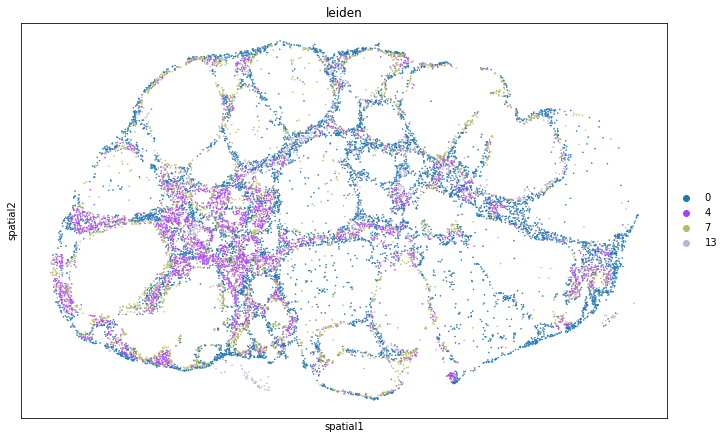

In [20]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','4','7','13'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

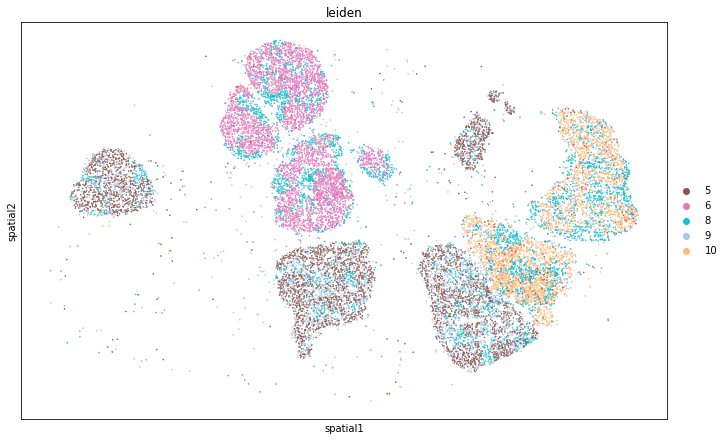

In [33]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['9','6','8','5','10'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

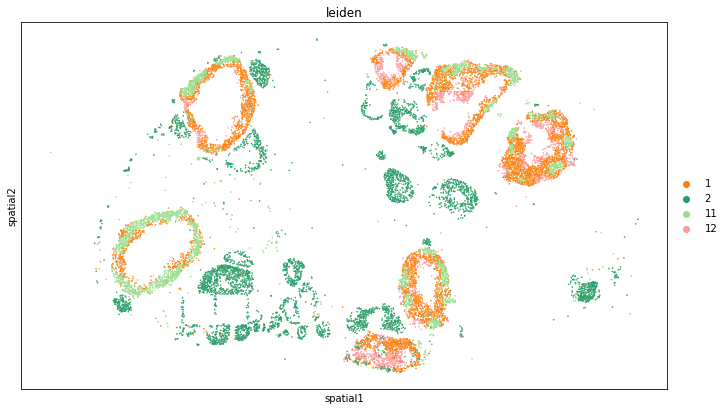

In [31]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['1','2','12','11'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

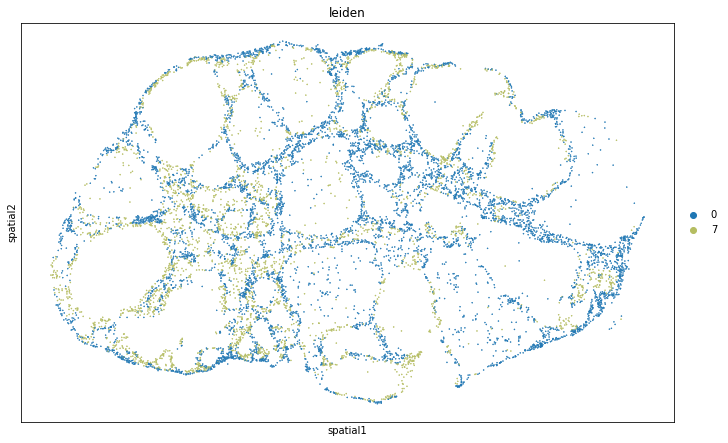

In [21]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','7'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

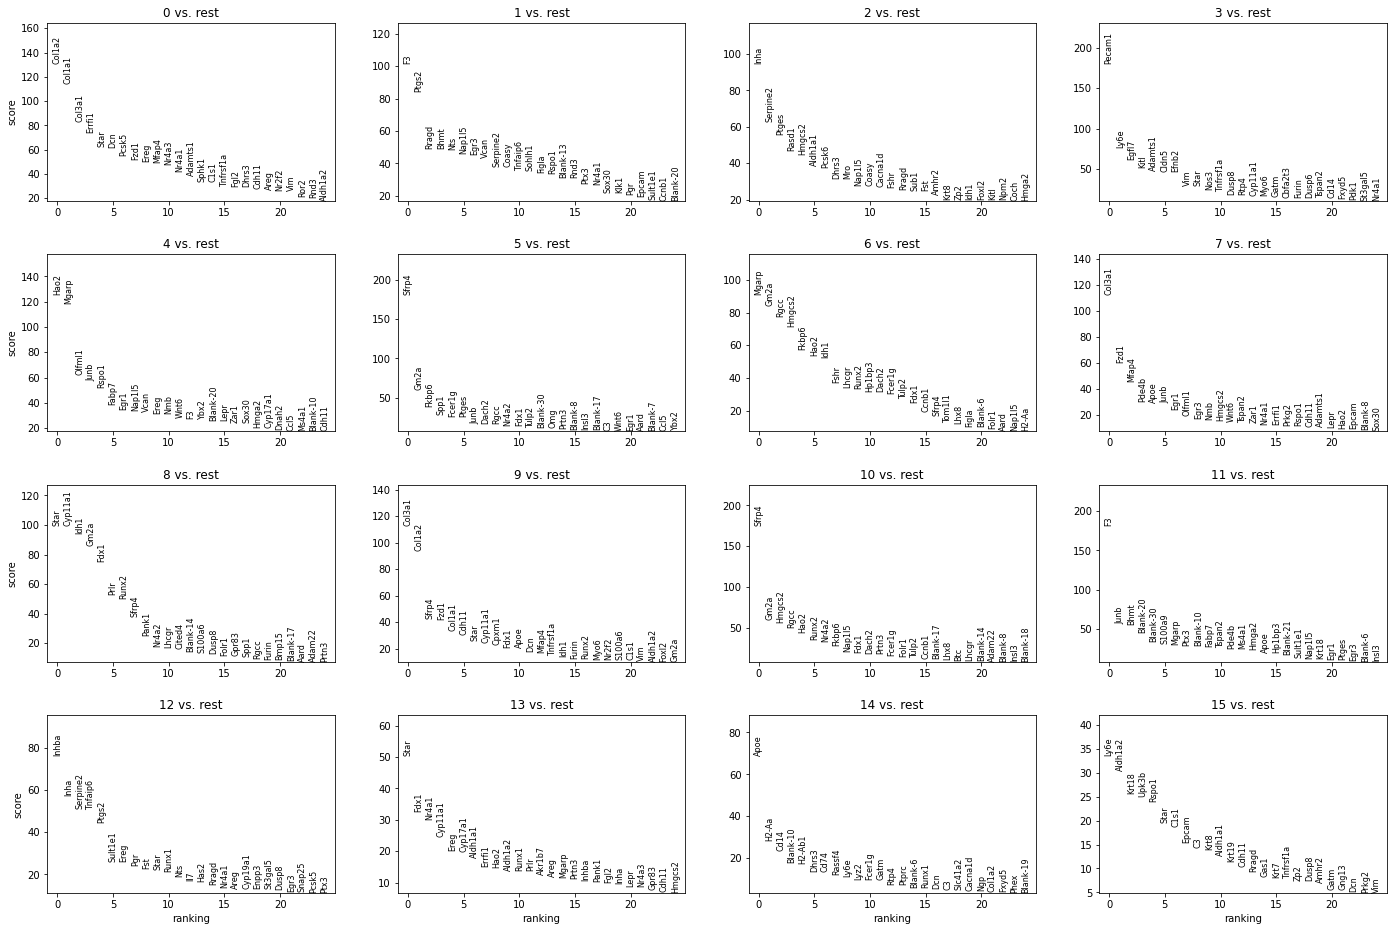

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")
0 - stroma
4 - theca
7 - stroma
13 - theca

In [22]:
def get_new_value(leiden_value):
    if leiden_value in ['Leiden-0', 'Leiden-7']:
        return 'stroma'
    elif leiden_value in ['Leiden-4','Leiden-13']:
        return 'theca'
    elif leiden_value in ['Leiden-5','Leiden-6','Leiden-8','Leiden-9','Leiden-10']:
        return 'luteal'
    elif leiden_value in ['Leiden-15']:
        return 'epithelial'
    elif leiden_value in ['Leiden-1', 'Leiden-2','Leiden-11','Leiden-12']:
        return 'granulosa'
    elif leiden_value in ['Leiden-14']:
        return 'immune'
    elif leiden_value in ['Leiden-3']:
        return 'endothelial'
    else:
        return 'unknown1'

# apply the function to each row of the 'Leiden' column using the apply() method
meta_leiden['Cell_Type'] = meta_leiden['leiden'].apply(lambda x: get_new_value(x))

print(meta_leiden)

           cell counts     leiden    Cell_Type
Leiden-0          6751   Leiden-0       stroma
Leiden-1          4542   Leiden-1    granulosa
Leiden-2          4500   Leiden-2    granulosa
Leiden-3          4377   Leiden-3  endothelial
Leiden-4          3714   Leiden-4        theca
Leiden-5          3478   Leiden-5       luteal
Leiden-6          3428   Leiden-6       luteal
Leiden-7          3310   Leiden-7       stroma
Leiden-8          3269   Leiden-8       luteal
Leiden-9          2987   Leiden-9       luteal
Leiden-10         2628  Leiden-10       luteal
Leiden-11         2589  Leiden-11    granulosa
Leiden-12         1346  Leiden-12    granulosa
Leiden-13         1201  Leiden-13        theca
Leiden-14          945  Leiden-14       immune
Leiden-15          326  Leiden-15   epithelial


In [23]:
meta_leiden['name'] = meta_leiden.apply(lambda x: x['Cell_Type'] + '_' + x['leiden'] , axis=1)
leiden_names = meta_leiden['name'].values.tolist()
meta_leiden.index = leiden_names


# transfer cell type labels to single cells
leiden_to_cell_type = deepcopy(meta_leiden)
leiden_to_cell_type.set_index('leiden', inplace=True)
leiden_to_cell_type.index.name = None

adata.obs['Cell_Type'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'Cell_Type'])
adata.obs['Cluster'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'name'])

In [23]:
set(adata.obs['Cluster'])

{'endothelial_Leiden-3',
 'epithelial_Leiden-15',
 'granulosa_Leiden-1',
 'granulosa_Leiden-11',
 'granulosa_Leiden-12',
 'granulosa_Leiden-2',
 'immune_Leiden-14',
 'luteal_Leiden-10',
 'luteal_Leiden-5',
 'luteal_Leiden-6',
 'luteal_Leiden-8',
 'luteal_Leiden-9',
 'mesenchymal_Leiden-0',
 'mesenchymal_Leiden-13',
 'mesenchymal_Leiden-4',
 'mesenchymal_Leiden-7'}

In [24]:
adata.write("/home/jupyter/region2_0824.h5ad")

In [25]:
palette = ["#e00089",
"#9e2409",
"#ff7d3e",
'#b151d8',
'#f2b1ed',
'#006ec9',
'#f9b69f']
adata.uns['Cell_Type_colors'] = palette

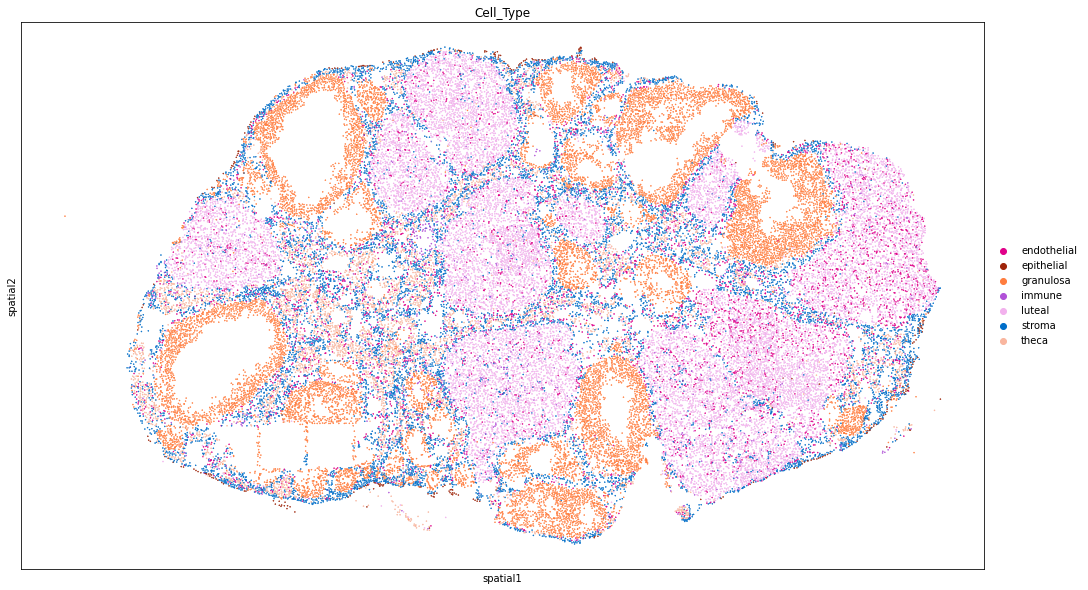

In [26]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cell_Type",
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

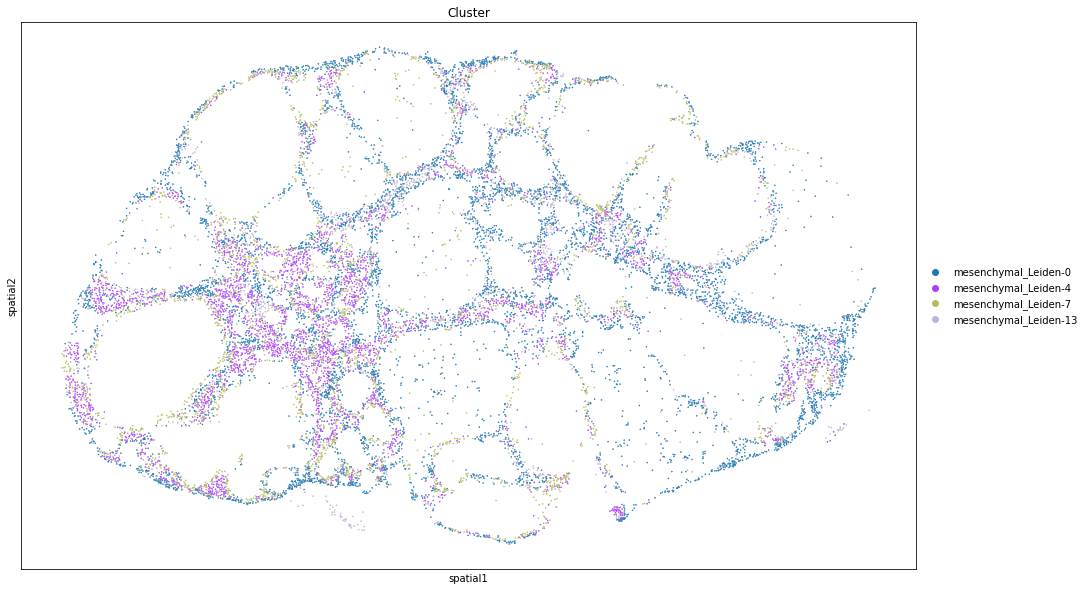

In [39]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    groups = ['mesenchymal_Leiden-0',
 'mesenchymal_Leiden-13',
 'mesenchymal_Leiden-4',
 'mesenchymal_Leiden-7'],
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

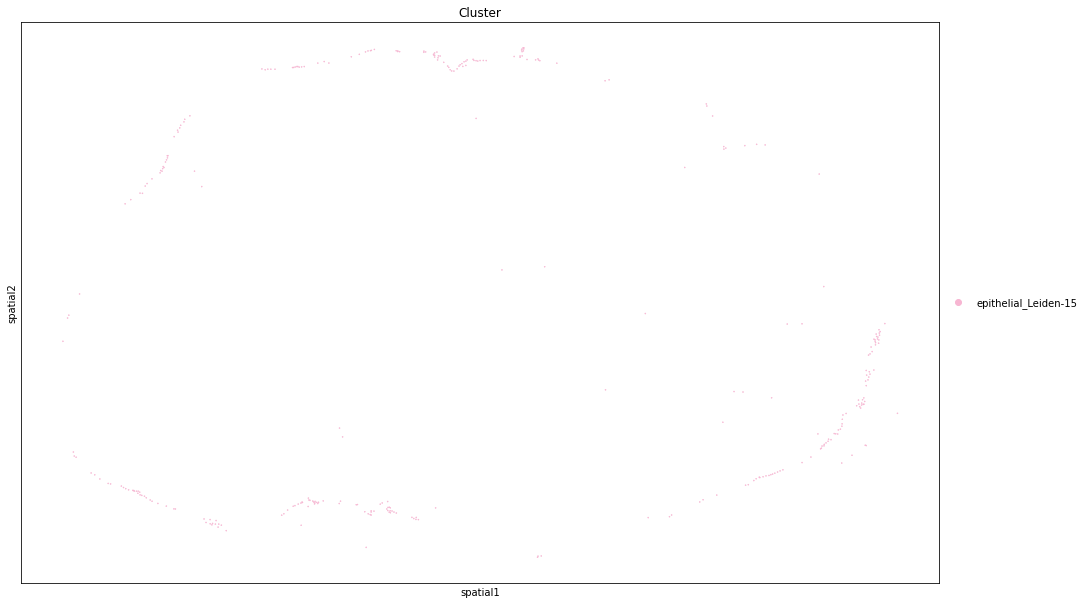

In [44]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    groups = ['epithelial_Leiden-15'],
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

  0%|          | 0/1000 [00:00<?, ?/s]

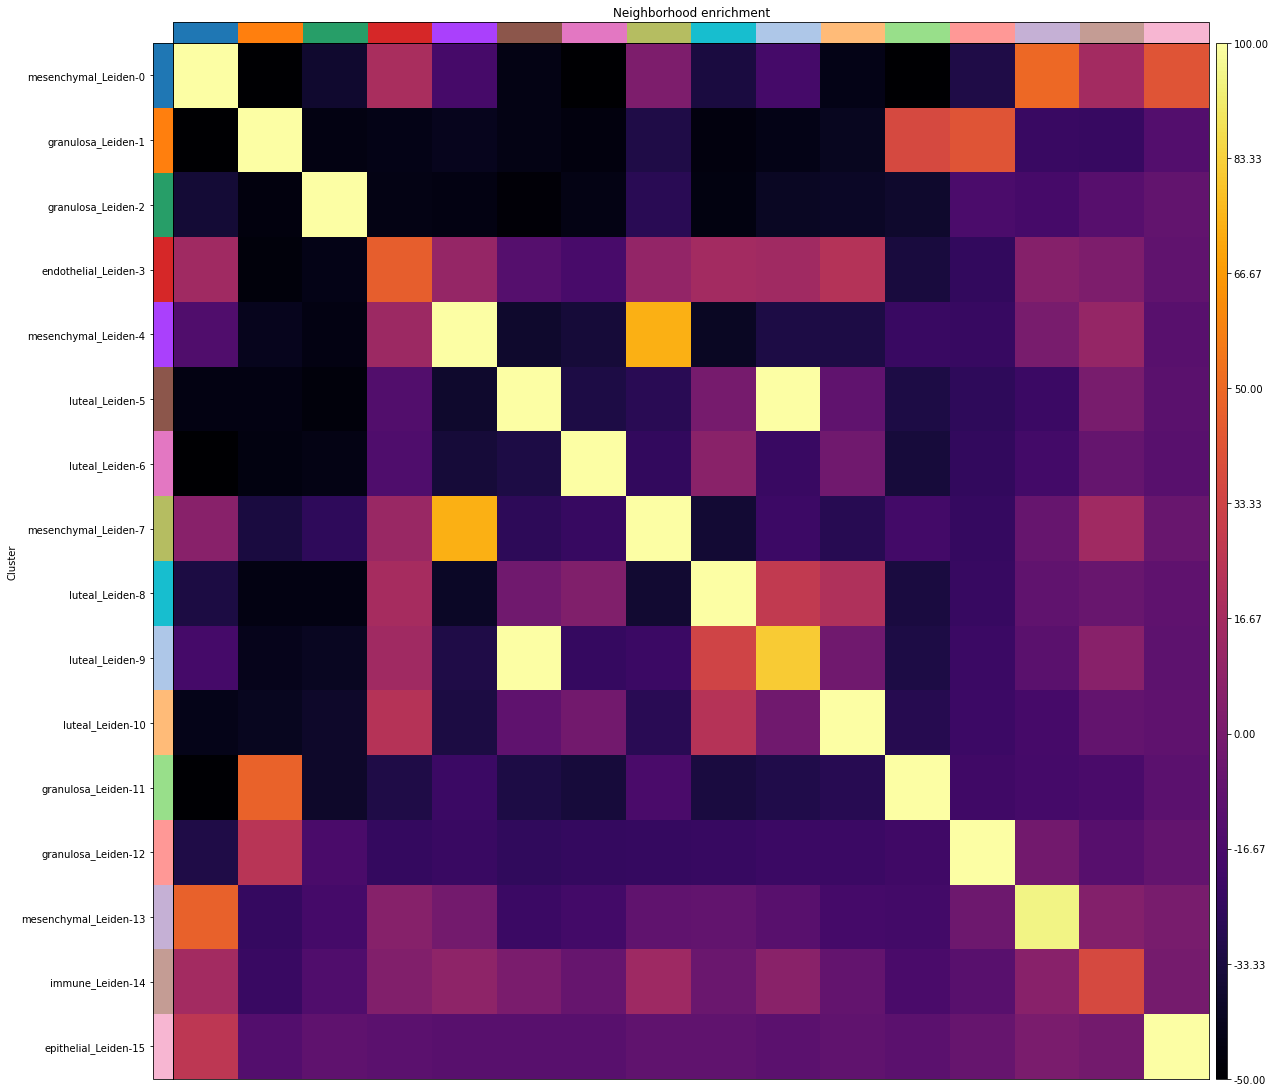

In [45]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(adata, cluster_key="Cluster")
sq.pl.nhood_enrichment(adata, cluster_key="Cluster", cmap="inferno", vmin=-50, vmax=100, figsize=(15,15))

In [46]:
sq.gr.spatial_autocorr(adata, mode="moran")
num_view = 12
top_autocorr = adata.uns['moranI']['I'].sort_values(ascending=False).head(num_view).index.tolist()
bot_autocorr = adata.uns['moranI']['I'].sort_values(ascending=True).head(num_view).index.tolist()

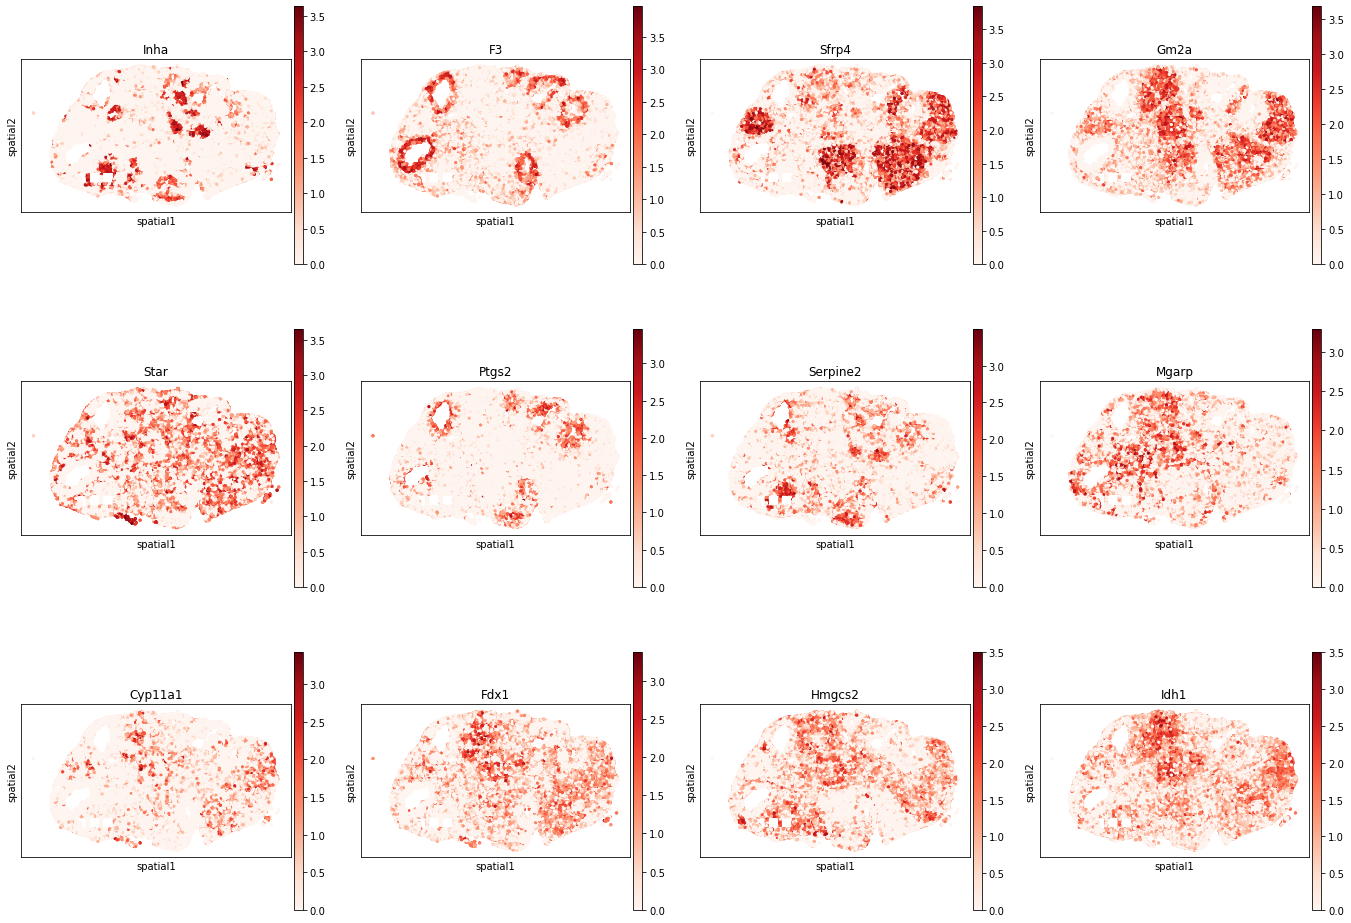

In [47]:
sq.pl.spatial_scatter(
    adata,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

In [48]:
sq.gr.centrality_scores(adata, cluster_key="Cluster")

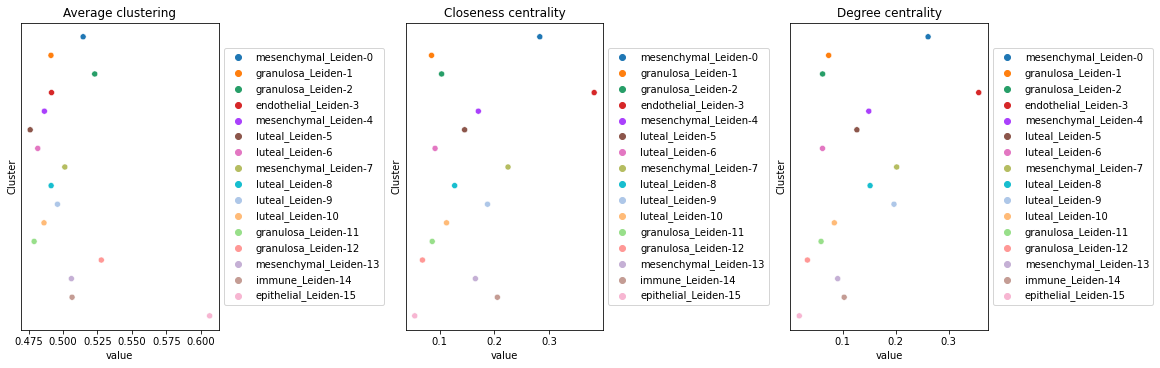

In [49]:
sq.pl.centrality_scores(adata, cluster_key="Cluster", figsize=(16, 5))

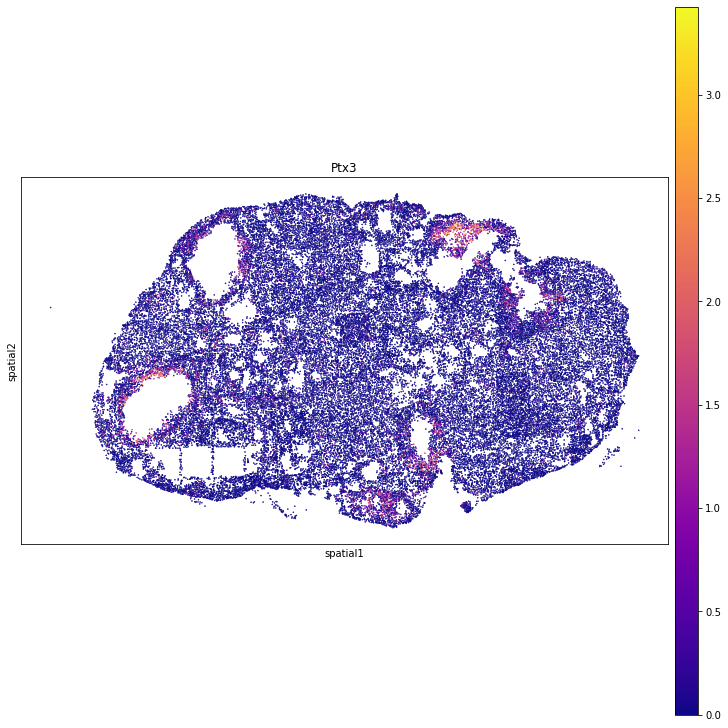

In [52]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Ptx3",
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'plasma',
)

In [27]:
adata.write('/home/jupyter/region_2/processed_region2.h5ad')

In [ ]:
gsutil cp processed_region2.h5ad gs://fc-7458d22e-a85c-48ad-ae70-9129add71bcc/output/202211141635_MouseOvaryTMArep1-JNCM14Nov22_VMSC00301/region_2